---
title: "Particle-based beam envelope tracker"
author: Austin Hoover
date: 2025-04-13
categories:
  - space charge
  - simulation
toc: true
---

## KV equilibrium distribution and envelope equations

The motion of intense charged particle beams is, in general, very complicated because of the Coloumb forces between particles. The distribution function $f(\mathbf{x}, \dot{\mathbf{x}}, t)$ evolves according to the Vlasov-Poisson equations 

$$
    \frac{df}{dt} 
    =
    \frac{\partial{f}}{\partial{t}} + 
    \dot{\mathbf{x} } \cdot \frac{\partial{f}}{\partial{     \mathbf{x}}} + 
    \frac{q}{m} \left( \mathbf{E} + \mathbf{v} \times \mathbf{B} \right) \cdot \frac{\partial{f}}{\partial{\dot{\mathbf{x}}}} 
    = 0,
$$ {#eq-vlasov}

where $q$ is the particle charge, $m$ is the particle mass, $\mathbf{E}$ is the electric field, and $\mathbf{B}$ is the magnetic field. $\mathbf{E}$ and $\mathbf{B}$ account for both external/applied and internal/self-generated fields. Assuming that self-generated magnetic fields are negligible and that applied fields are entirely magnetic, $\mathbf{E}(\mathbf{x}, t)$ is determined by the Poisson equation:

$$
\frac{\partial}{\partial \mathbf{x}} \mathbf{E}(\mathbf{x}, t) = \frac{1}{\epsilon_0} \int f(\mathbf{x}, 
\dot{\mathbf{x}}, t) d\dot{\mathbf{x}}.
$$ {#eq-poisson}

When the phase space is four-dimensional (4D), so that $\mathbf{x} = (x, \dot{x}, y, \dot{y})$, and when the focusing forces are time-dependent linear functions of $x$ and $y$, there is a special equilibrium solution to the Vlasov-Poisson equations known as the Kapchinskij-Vladimiskij (KV) distribution. The KV distribution is constructed from single-particle invariants $J_x(\mathbf{x}, \dot{\mathbf{x}})$ and $J_y(\mathbf{x}, \dot{\mathbf{x}})$, also called the *Courant-Snyder* invariants, in the time-dependent linear system as follows:

$$
f(\mathbf{x}, \dot{\mathbf{x}}) = \delta \left( 1 - \frac{J_x(\mathbf{x}, \dot{\mathbf{x}})}{\tilde{J_x}} - \frac{J_y(\mathbf{x}, \dot{\mathbf{x}})}{\tilde{J_y}} \right)
$$ {#eq-kv}

The KV distribution is a uniformly populated ellipsoid in the 4D phase space, with the constants $\tilde{J}_{x,y}$ determining the ellipsoid dimensions. To prove that the distribution is in equilibrium, we have to show that it generates a linear electric field (linear in the positions $x$ and $y$), since a linear electric field preserves the single-particle invariants from which the distribution is constructed. Proving this is actually [fairly involved](https://people.frib.msu.edu/~lund/uspas/bpisc_2020/lec_set_03/ted_ho.pdf). The first step is to show that a uniform-density 4D ellipsoid projects to a uniform charge density within an elliptical envelope in the $x$-$y$ plane; i.e., for a beam of line density $\lambda$ and ellipse radii $r_{x, y}$, the density is

$$
f(x, y) = 
\begin{cases}
  -\frac{\lambda}{\pi \epsilon_0 r_x r_y}, & \text{if}\ (\frac{x}{r_x})^2 + (\frac{y}{r_y})^2 < 1 \\
  0, & \text{otherwise}
\end{cases}
$$ {#eq-kv-density}

The second step is to solve the Poisson equation for this charge distribution. The end result is a simple expression for the field $E(\mathbf{x}) = (E_x, E_y)$ *inside* the ellipse:

$$
\begin{aligned}
E_x &= -\frac{\lambda}{\pi \epsilon_0} \frac{x}{(r_x + r_y) r_x} \\
E_y &= -\frac{\lambda}{\pi \epsilon_0} \frac{y}{(r_x + r_y) r_y} \\
\end{aligned}
$$ {#eq-kv-field}

The field *outside* the ellipse is nonlinear in $x$ and $y$; however, since there are no particles outside the ellipse, all particles see a linear net force from the beam and external fields.

Let's plug these fields into the single-particle equations of motion. If $\kappa(s)$ is the applied focusing strength at location $s$, then

$$
\begin{aligned}
x''(s) &= \left[ \kappa(s) - \frac{2Q}{(r_x(s) + r_y(s)) r_x(s)} \right] x(s) \\
y''(s) &= \left[ \kappa(s) - \frac{2Q}{(r_x(s) + r_y(s)) r_y(s)} \right] y(s) \\
\end{aligned}
$$ {#eq-kv-single}

Here $' = d/ds$ and $Q$ is the *perveance*, which is the charge density scaled by a factor which depends on the beam energy (higher energy = weaker space charge forces). With some additional work, we can derive differential equations for $r_x$ and $r_y$:

$$
\begin{aligned}
r_x''(s) &= \kappa(s) r_x(s) + \frac{\varepsilon_x^2}{r_x(s)^3} - \frac{2Q}{r_x(s) + r_y(s)} \\
r_y''(s) &= \kappa(s) r_y(s) + \frac{\varepsilon_y^2}{r_y(s)^3} - \frac{2Q}{r_x(s) + r_y(s)} \\
\end{aligned}
$$ {#eq-kv-env}

Here $\varepsilon_x = 4\sqrt{\langle xx \rangle \langle x'x' \rangle - \langle xx' \rangle \langle xx' \rangle}$ and  $\varepsilon_y = 4\sqrt{\langle yy \rangle \langle y'y' \rangle - \langle yy' \rangle \langle yy' \rangle}$ are the invariant areas of the $x$-$x'$ and $y$-$y'$ phase space ellipses; we call them the *emittances*. The first term in @eq-kv-field is the effect of linear focusing, the second term accounts the incompressibility of the phase space volume, and the third term accounts for linear space charge forces. This set of differential equations can be solved numerically to obtain the evolution of the beam *envelope*, i.e., the beam sizes $r_{x, y}$, as a function of time.

## Particle-based envelope solver

[Jeff Holmes](https://web.ornl.gov/~holmesja1/JHolmes/interests.html) had a neat idea to solve the KV envelope equations equations using the [PyORBIT](https://github.com/PyORBIT-Collaboration/PyORBIT3) tracking code. He noted that the first term @eq-kv-env resembles a single-particle equation of motion, where $r_x$ and $r_y$ are treated as the particle coordinates, and that the next two terms act as nonlinear driving forces on this fictitous particle. It's straightforward to implement integrate these equations in PyORBIT, which represents the accelerator as a set of *nodes* that sequentially update the phase space coordinates of each particle in the bunch. We can simply let the first bunch particle store the envelope radii $r_{x, y}$ as its $x$ and $y$ coordinates, and the first derivatives $r_{x,y}'$ as its $x'$ and $y'$ coordinates. The first term in @eq-kv-env will be handled by the existing nodes in the lattice. To apply the nonlinear driving terms, we can define a new node which applies a momentum kick based on these coordinates and constants $\varepsilon_{x}$, $\varepsilon_y$, and $Q$. All additional particles in the bunch can receive regular space charge kicks, assuming a uniform-density elliptical beam with dimensions given by the envelope parameters. These additional particles are considered "test" particles because they do not affect the space charge field of the beam in a self-consistent way.

PyORBIT tracking algorithms are written in C++ and accessible from the Python level using "wrapper" functions. So to implement the new node type, we start by writing a C++ class. The fundamental object in PyORBIT is a `Bunch`, which contains an array of phase space coordinates for each particle. The method below tracks a bunch instance over a distance `length`.

```cpp
#include "KVEnvelopeSolver.hh"

KVEnvelopeSolver::KVEnvelopeSolver(double perveance, double eps_x, double eps_y) : CppPyWrapper(NULL) {
  _perveance = perveance;
  _eps_x = eps_x;
  _eps_y = eps_y;
}

void KVEnvelopeSolver::trackBunch(Bunch *bunch, double length) {
  // Track envelope parameters
  double cx = bunch->x(0);
  double cy = bunch->y(0);
  double sc_term = 2.0 * _perveance / (cx + cy);
  double emit_term_x = (_eps_x * _eps_x) / (cx * cx * cx);
  double emit_term_y = (_eps_y * _eps_y) / (cy * cy * cy);
  bunch->xp(0) += length * (sc_term + emit_term_x);
  bunch->yp(0) += length * (sc_term + emit_term_y);

  // Track test particles
  double cx2 = cx * cx;
  double cy2 = cy * cy;

  double x;
  double y;
  double x2;
  double y2;

  double B;
  double C;
  double Dx;
  double Dy;
  double t1;

  double delta_xp;
  double delta_yp;
  bool in_ellipse;

  for (int i = 1; i < bunch->getSize(); i++) {
    // Get particle coordinates (x-y)
    x = bunch->x(i);
    y = bunch->y(i);

    // Is this particle inside the beam ellipse?
    x2 = x * x;
    y2 = y * y;
    in_ellipse = ((x2 / cx2) + (y2 / cy2)) <= 1.0;

    // Compute momentum kick
    if (in_ellipse) {
      // Linear kick inside ellipse
      delta_xp = sc_term * x / cx;
      delta_yp = sc_term * y / cy;
    } 
    else {
      // Nonlinear kick outside ellipse (https://arxiv.org/abs/physics/0108040)
      B = x2 + y2 - cx2 - cy2;
      C = x2 * cy2 + y2 * cx2 - cx2 * cy2;
      t1 = pow(0.25 * B * B + C, 0.5) + 0.5 * B;
      Dx = pow(cx2 + t1, 0.5);
      Dy = pow(cy2 + t1, 0.5);
      delta_xp = 2.0 * _perveance * x / (Dx * (Dx + Dy));
      delta_yp = 2.0 * _perveance * y / (Dy * (Dx + Dy));
    }

    // Update particle coordiantes
    bunch->xp(i) += delta_xp;
    bunch->yp(i) += delta_yp;
  }
}
```

After compilation, the C++ class is accessible from the `orbit.ext.kv_envelope` module in Python scripts. To use this solver in simulations, we need a Python object that subclasses `orbit.lattice.AccNodeBunchTracker`, a base class for all PyORBIT node classes. This class just calls the `KVEnvelopeSolver` instance when it's time to track the bunch.

```python
from orbit.lattice import AccActionsContainer
from orbit.lattice import AccLattice
from orbit.lattice import AccNode
from orbit.lattice import AccNodeBunchTracker

from orbit.ext.kv_envelope import KVEnvelopeSolver


class KVEnvelopeSolverNode(AccNodeBunchTracker):
    def __init__(
        self,
        eps_x: float,
        eps_y: float,
        perveance: float = 0.0,
        kick_length: float = 0.0,
        name: str = None,
    ) -> None:
        super().__init__(name=name)
        self.setType("KVEnvelopeSolver")
        self.setLength(0.0)

        self.eps_x = eps_x
        self.eps_y = eps_y
        self.perveance = perveance
        self.solver = KVEnvelopeSolver(self.perveance, self.eps_x, self.eps_y)

        self.active = True

    def set_active(self, setting: bool) -> None:
        self.active = setting

    def set_kick_length(self, kick_length: float) -> None:
        self.kick_length = kick_length

    def set_perveance(self, perveance: float) -> None:
        self.solver.setPerveance(perveance)

    def set_emittances(self, eps_x: float, eps_y: float) -> None:
        self.eps_x = eps_x
        self.eps_y = eps_y
        self.solver.setEmittanceX(eps_x)
        self.solver.setEmittanceY(eps_y)

    def track(self, params_dict: dict) -> None:
        if not self.active:
            return
        bunch = params_dict["bunch"]
        self.solver.trackBunch(bunch, self.kick_length)
```

I'll now create a function to add a set of these nodes to an existing `AccLattice` objects. This function will split up the existing nodes as necessary to approach evenly-spaced KV envelope solver nodes. The function also sets the length of the space charge kick to match the subsequent node length.

```python
class Parent:
    def __init__(self, node: AccNode, part_index: int, position: float, path_length: float) -> None:
        self.node = node
        self.name = self.node.getName()
        self.part_index = part_index
        self.position = position
        self.path_length = path_length


def set_max_path_length(lattice: AccLattice, length: float) -> AccLattice:
    if length:
        for node in lattice.getNodes():
            if node.getLength() > length:
                node.setnParts(1 + int(node.getLength() / length))
    return lattice


def add_kv_envelope_solver_nodes(
    lattice: AccLattice,
    path_length_max: float,
    path_length_min: float,
    **solver_node_kwargs
) -> list[KVEnvelopeSolverNode]:
    """Add KV envelope solver nodes to the lattice."""
    nodes = lattice.getNodes()
    if not nodes:
        return []

    lattice = set_max_path_length(lattice, path_length_max)

    parents = []
    length_total = running_path = rest_length = 0.0
    for node in nodes:
        for part_index in range(node.getnParts()):
            part_length = node.getLength(part_index)
            parent = Parent(node, part_index, position=length_total, path_length=running_path)
            if running_path > path_length_min:
                parents.append(parent)
                running_path = 0.0
            running_path += part_length
            length_total += part_length

    if len(parents) > 0:
        rest_length = length_total - parents[-1].position
    else:
        rest_length = length_total

    parent = Parent(node=nodes[0], part_index=0, position=0.0, path_length=rest_length)
    parents.insert(0, parent)

    solver_nodes = []
    for i in range(len(parents) - 1):
        parent = parents[i]
        parent_new = parents[i + 1]
        solver_node_name = f"{parent.name}:{parent.part_index}:kv_envelope_solver"
        solver_node = KVEnvelopeSolverNode(name=solver_node_name, kick_length=parent_new.path_length, **solver_node_kwargs)
        parent.node.addChildNode(solver_node, parent.node.BODY, parent.part_index, parent.node.BEFORE)
        solver_nodes.append(solver_node)

    parent = parents[-1]
    solver_node_name = f"{parent.name}:{parent.part_index}:kv_envelope_solver"
    solver_node = KVEnvelopeSolverNode(name=solver_node_name, kick_length=rest_length, **solver_node_kwargs)
    solver_nodes.append(solver_node)
    parent.node.addChildNode(solver_node, parent.node.BODY, parent.part_index, parent.node.BEFORE)
    return solver_nodes
```

Finally, we need a way to easily run simulations. I'll first create a class called `KVEnvelope` that lets me set the distribution parameters, intensity, etc. 

```python
import copy
from typing import Iterable
from typing import Self

import numpy as np
import scipy.optimize

from orbit.core.bunch import Bunch
from orbit.bunch_generators import KVDist2D
from orbit.bunch_generators import TwissContainer
from orbit.teapot import TEAPOT_MATRIX_Lattice
from orbit.utils import consts


class KVEnvelope:
    def __init__(
        self,
        eps_x: float,
        eps_y: float,
        mass: float,
        kin_energy: float,
        length: float,
        intensity: int,
    ) -> None:
        self.eps_x = eps_x
        self.eps_y = eps_y
        self.mass = mass
        self.kin_energy = kin_energy

        self.length = length
        self.line_density = None
        self.perveance = None
        self.set_intensity(intensity)

        cx = 2.0 * np.sqrt(self.eps_x * 4.0)
        cy = 2.0 * np.sqrt(self.eps_y * 4.0)
        self.params = [cx, 0.0, cy, 0.0]

    def set_intensity(self, intensity: int) -> None:
        self.intensity = intensity
        self.line_density = intensity / self.length
        self.perveance = get_perveance(self.mass, self.kin_energy, self.line_density)

    def set_length(self, length: float) -> None:
        self.length = length
        self.set_intensity(self.intensity)

    def set_params(self, params: np.ndarray) -> None:
        self.params = np.copy(params)

    def copy(self) -> Self:
        return copy.deepcopy(self)

    def cov(self) -> np.ndarray:
        """Return covariance matrix."""
        (cx, cxp, cy, cyp) = self.params
        cov_matrix = np.zeros((4, 4))
        cov_matrix[0, 0] = 0.25 * cx**2
        cov_matrix[2, 2] = 0.25 * cy**2
        cov_matrix[1, 1] = 0.25 * cxp**2 + 4.0 * (self.eps_x / cx) ** 2
        cov_matrix[3, 3] = 0.25 * cyp**2 + 4.0 * (self.eps_y / cy) ** 2
        cov_matrix[0, 1] = cov_matrix[1, 0] = 0.25 * cx * cxp
        cov_matrix[2, 3] = cov_matrix[3, 2] = 0.25 * cy * cyp
        return cov_matrix

    def set_cov(self, cov_matrix: np.ndarray) -> None:
        """Set covariance matrix."""
        self.eps_x = np.sqrt(np.linalg.det(cov_matrix[0:2, 0:2]))
        self.eps_y = np.sqrt(np.linalg.det(cov_matrix[2:4, 2:4]))
        cx = np.sqrt(4.0 * cov_matrix[0, 0])
        cy = np.sqrt(4.0 * cov_matrix[2, 2])
        cxp = 2.0 * cov_matrix[0, 1] / np.sqrt(cov_matrix[0, 0])
        cyp = 2.0 * cov_matrix[2, 3] / np.sqrt(cov_matrix[2, 2])
        params = np.array([cx, cxp, cy, cyp])
        self.set_params(params)

    def twiss(self) -> dict[str, float]:
        """Return (alpha_x, beta_x, alpha_y, beta_y)."""
        cov_matrix = self.cov()
        emittance_x = np.sqrt(np.linalg.det(cov_matrix[0:2, 0:2]))
        emittance_y = np.sqrt(np.linalg.det(cov_matrix[2:4, 2:4]))
        alpha_x = -cov_matrix[0, 1] / emittance_x
        alpha_y = -cov_matrix[2, 3] / emittance_y
        beta_x = cov_matrix[0, 0] / emittance_x
        beta_y = cov_matrix[2, 2] / emittance_y

        results = {}
        results["alpha_x"] = alpha_x
        results["alpha_y"] = alpha_y
        results["beta_x"] = beta_x
        results["beta_y"] = beta_y
        results["emittance_x"] = emittance_x
        results["emittance_y"] = emittance_y
        return results

    def set_twiss(self, alpha_x: float, beta_x: float, alpha_y: float, beta_y: float) -> None:
        """Set Twiss parameters in each plane."""
        gamma_x = (1.0 + alpha_x**2) / beta_x
        gamma_y = (1.0 + alpha_y**2) / beta_y
        cov_matrix = np.zeros((4, 4))
        cov_matrix[0, 0] = beta_x * self.eps_x
        cov_matrix[2, 2] = beta_y * self.eps_y
        cov_matrix[1, 1] = gamma_x * self.eps_x
        cov_matrix[3, 3] = gamma_y * self.eps_y
        cov_matrix[0, 1] = cov_matrix[1, 0] = -alpha_x * self.eps_x
        cov_matrix[2, 3] = cov_matrix[3, 2] = -alpha_y * self.eps_y
        self.set_cov(cov_matrix)

    def sample(self, size: int, dist: str = "kv") -> np.ndarray:
        """Sample particles from KV distribution."""
        twiss_params = self.twiss()
        twiss_x = TwissContainer(
            twiss_params["alpha_x"],
            twiss_params["beta_x"],
            twiss_params["emittance_x"],
        )
        twiss_y = TwissContainer(
            twiss_params["alpha_y"],
            twiss_params["beta_y"],
            twiss_params["emittance_y"],
        )
        dist = KVDist2D(twiss_x, twiss_y)
        
        samples = np.zeros((size, 6))
        for i in range(size):
            (x, xp, y, yp) = dist.getCoordinates()
            z = np.random.uniform(-0.5 * self.length, 0.5 * self.length)
            samples[i, :] = [x, xp, y, yp, z, 0.0]
        return samples

    def from_bunch(self, bunch: Bunch) -> np.ndarray:
        """Set envelope parameters from Bunch."""
        self.params = np.zeros(4)
        self.params[0] = bunch.x(0)
        self.params[1] = bunch.xp(0)
        self.params[2] = bunch.y(0)
        self.params[3] = bunch.yp(0)
        return self.params

    def to_bunch(self, n_test: int = 0, env: bool = True) -> Bunch:
        """Create Bunch object from envelope parameters."""
        bunch = Bunch()
        bunch.mass(self.mass)
        bunch.getSyncParticle().kinEnergy(self.kin_energy)

        if env:
            # Add fictitous envelope particle.
            (cx, cxp, cy, cyp) = self.params
            bunch.addParticle(cx, cxp, cy, cyp, 0.0, 0.0)

        if n_test > 0:
            # Add test particles.
            samples = self.sample(n_test)
            for i in range(samples.shape[0]):
                bunch.addParticle(*samples[i])

        return bunch
```

I'll also need a `KVEnvelopeMonitor` class to store the envelope parameters vs. tracking distance. 

```python
class KVEnvelopeMonitor:
    def __init__(self, verbose: int = 0) -> None:
        self.verbose = verbose
        self.distance = 0.0
        self._pos_old = 0.0
        self._pos_new = 0.0

        self.history = {}
        for key in ["s", "xrms", "yrms"]:
            self.history[key] = []

    def package(self) -> None:
        history = copy.deepcopy(self.history)
        for key in history:
            history[key] = np.array(history[key])
        history["s"] -= history["s"][0]
        return history

    def __call__(self, params_dict: dict) -> None:
        bunch = params_dict["bunch"]
        node = params_dict["node"]

        # Update tracking distance
        self._pos_new = params_dict["path_length"]
        if self._pos_old > self._pos_new:
            self._pos_old = 0.0
        self.distance += self._pos_new - self._pos_old
        self._pos_old = self._pos_new

        # Store rms beam size
        x_rms = bunch.x(0) * 0.5
        y_rms = bunch.y(0) * 0.5

        self.history["s"].append(self.distance)
        self.history["xrms"].append(x_rms)
        self.history["yrms"].append(y_rms)

        # Print update
        if self.verbose:
            print("s={:0.3f} x_rms={:0.2f}, y_rms={:0.2f}".format(self.distance, x_rms, y_rms))
```

Finally, I'll create a `KVEnvelopeTracker` class that modifies an existing lattice by adding envelope solver nodes and tracks the envelope.

```python
class KVEnvelopeTracker:
    """KV envelope tracker."""
    def __init__(self, lattice: AccLattice, path_length_max: float = None) -> None:
        self.lattice = lattice
        self.solver_nodes = add_kv_envelope_solver_nodes(
            lattice=self.lattice,
            path_length_min=1.00e-06,
            path_length_max=path_length_max,
            perveance=0.0,  # will update based on envelope
            eps_x=1.0,  # will update based on envelope
            eps_y=1.0,  # will update based on envelope
        )

        # Upper/lower bounds on envelope parameters
        self.ub = np.full(4, +np.inf)
        self.lb = np.full(4, -np.inf)
        self.lb[0] = +1.00e-12
        self.lb[2] = +1.00e-12

    def toggle_solver_nodes(self, setting: bool) -> None:
        """Turn solver nodes on/off."""
        for node in self.solver_nodes:
            node.active = setting

    def update_solver_node_parameters(self, envelope: KVEnvelope) -> None:
        """Update solver node parameters based on beam."""
        for solver_node in self.solver_nodes:
            solver_node.set_perveance(envelope.perveance)
            solver_node.set_emittances(envelope.eps_x * 4.0, envelope.eps_y * 4.0)

    def track(self, envelope: KVEnvelope, periods: int = 1) -> dict[str, np.ndarray]:
        """Track the envelope + distribution through the lattice."""
        self.update_solver_node_parameters(envelope)

        monitor = KVEnvelopeMonitor()
        action_container = AccActionsContainer()
        action_container.addAction(monitor, AccActionsContainer.ENTRANCE)
        action_container.addAction(monitor, AccActionsContainer.EXIT)

        bunch = envelope.to_bunch()
        for period in range(periods):
            self.lattice.trackBunch(bunch, actionContainer=action_container)

        envelope.from_bunch(bunch)
        history = monitor.package()
        return history

    def match_zero_sc(self, envelope: KVEnvelope) -> None:
        """Match envelope to lattice without space charge."""
        self.toggle_solver_nodes(False)
        bunch = envelope.to_bunch(size=0, env=False)
        matrix_lattice = TEAPOT_MATRIX_Lattice(self.lattice, bunch)
        lattice_params = matrix_lattice.getRingParametersDict()
        self.toggle_solver_nodes(True)

        alpha_x = lattice_params["alpha x"]
        alpha_y = lattice_params["alpha y"]
        beta_x = lattice_params["beta x [m]"]
        beta_y = lattice_params["beta y [m]"]
        envelope.set_twiss(alpha_x, beta_x, alpha_y, beta_y)

    def match(self, envelope: DanilovEnvelope20, periods: int = 1, **kwargs) -> None:
        """Match envelope to lattice with space charge."""
        if envelope.perveance == 0.0:
            return self.match_zero_sc(envelope)

        def loss_function(params: np.ndarray) -> np.ndarray:
            envelope.set_params(params)

            loss = 0.0
            for period in range(periods):
                self.track(envelope)
                residuals = envelope.params - params
                residuals = 1000.0 * residuals
                loss += np.mean(np.abs(residuals))
            return loss / float(periods)

        kwargs.setdefault("xtol", 1.00e-13)
        kwargs.setdefault("ftol", 1.00e-13)
        kwargs.setdefault("gtol", 1.00e-13)
        kwargs.setdefault("verbose", 2)

        result = scipy.optimize.least_squares(
            loss_function, envelope.params.copy(), bounds=(self.lb, self.ub), **kwargs
        )
```

I've also added capabilities to find the periodic envelope, i.e., an envelope which returns to its original state after one lattice period.

## Benchmark against PIC solver

In the rest of this post, I'll benchmark the KV envelope solver against direct particle-in-cell (PIC) calculations. Some utility functions are defined below to generate a FODO lattice for the benchmark.

In [ ]:
#| echo: false
import copy
import math

import numpy as np
import matplotlib.pyplot as plt

from orbit.core.bunch import Bunch
from orbit.core.spacecharge import SpaceChargeCalc2p5D
from orbit.lattice import AccLattice
from orbit.lattice import AccNode
from orbit.lattice import AccActionsContainer
from orbit.space_charge.sc2p5d import SC2p5D_AccNode
from orbit.space_charge.sc2p5d import setSC2p5DAccNodes
from orbit.danilov_envelope import DanilovEnvelope20 as KVEnvelope
from orbit.danilov_envelope import DanilovEnvelopeSolverNode20 as KVEnvelopeSolverNode
from orbit.danilov_envelope import DanilovEnvelopeTracker20 as KVEnvelopeTracker

plt.rcParams["figure.dpi"] = 1000.0
plt.style.use("style.mplstyle")

In [5]:
#| echo: true
#| code-fold: true
import numpy as np
import scipy.optimize
from orbit.core.bunch import Bunch
from orbit.core.bunch import BunchTwissAnalysis
from orbit.lattice import AccLattice
from orbit.lattice import AccNode
from orbit.teapot import TEAPOT_Lattice
from orbit.teapot import TEAPOT_MATRIX_Lattice
from orbit.teapot import DriftTEAPOT
from orbit.teapot import QuadTEAPOT

def split_node(node: AccNode, max_part_length: float = None) -> AccNode:
    if max_part_length:
        if node.getLength() > max_part_length:
            node.setnParts(1 + int(node.getLength() / max_part_length))
    return node

def compute_phase_advances(lattice: AccLattice, mass: float, kin_energy: float) -> np.ndarray:
    bunch = Bunch()
    bunch.mass(mass)
    bunch.getSyncParticle().kinEnergy(kin_energy)
    matrix_lattice = TEAPOT_MATRIX_Lattice(lattice, bunch)
    lattice_params = matrix_lattice.getRingParametersDict()
    phase_adv = [
        lattice_params["fractional tune x"],
        lattice_params["fractional tune y"],
    ]
    phase_adv = np.array(phase_adv)
    phase_adv = phase_adv * 2.0 * np.pi
    return phase_adv

def make_fodo_lattice(
    phase_adv_x: float,
    phase_adv_y: float,
    length: float,
    mass: float,
    kin_energy: float,
    fill_factor: float = 0.5,
    start: str = "drift",
    fringe: bool = False,
    max_part_length: float = 0.1,
    verbose: bool = False,
) -> AccLattice:
    """Create FODO lattice.

    Parameters
    ----------
    phase_adv_x{y}: float
        The x{y} lattice phase advance [rad].
    length : float
        The length of the lattice [m].
    mass, kin_energy : float
        Mass [GeV/c^2] and kinetic energy [GeV] of synchronous particle.
    fill_fac : float
        The fraction of the lattice occupied by quadrupoles.
    fringe : bool
        Whether to include nonlinear fringe fields in the lattice.
    start : str
        If 'drift', the lattice will be O-F-O-O-D-O. If 'quad' the lattice will
        be (F/2)-O-O-D-O-O-(F/2).
    reverse : bool
        If True, reverse the lattice elements.

    Returns
    -------
    TEAPOT_Lattice
    """

    def _make_lattice(k1: float, k2: float) -> AccLattice:
        """Create FODO lattice with specified focusing strengths.

        k1 and k2 are the focusing strengths of the
        focusing (1st) and defocusing (2nd) quads, respectively.
        """
        # Instantiate elements
        lattice = TEAPOT_Lattice()
        drift1 = DriftTEAPOT("drift1")
        drift2 = DriftTEAPOT("drift2")
        drift_half1 = DriftTEAPOT("drift_half1")
        drift_half2 = DriftTEAPOT("drift_half2")
        qf = QuadTEAPOT("qf")
        qd = QuadTEAPOT("qd")
        qf_half1 = QuadTEAPOT("qf_half1")
        qf_half2 = QuadTEAPOT("qf_half2")
        qd_half1 = QuadTEAPOT("qd_half1")
        qd_half2 = QuadTEAPOT("qd_half2")

        # Set lengths
        half_nodes = (drift_half1, drift_half2, qf_half1, qf_half2, qd_half1, qd_half2)
        full_nodes = (drift1, drift2, qf, qd)
        for node in half_nodes:
            node.setLength(length * fill_factor / 4.0)
        for node in full_nodes:
            node.setLength(length * fill_factor / 2.0)

        # Set quad focusing strengths
        for node in (qf, qf_half1, qf_half2):
            node.addParam("kq", +k1)
        for node in (qd, qd_half1, qd_half2):
            node.addParam("kq", -k2)

        # Create lattice
        if start == "drift":
            lattice.addNode(drift_half1)
            lattice.addNode(qf)
            lattice.addNode(drift2)
            lattice.addNode(qd)
            lattice.addNode(drift_half2)
        elif start == "quad":
            lattice.addNode(qf_half1)
            lattice.addNode(drift1)
            lattice.addNode(qd)
            lattice.addNode(drift2)
            lattice.addNode(qf_half2)

        # Toggle fringe fields
        for node in lattice.getNodes():
            node.setUsageFringeFieldIN(fringe)
            node.setUsageFringeFieldOUT(fringe)

        lattice.initialize()
        return lattice

    def loss_function(k: np.ndarray) -> float:
        lattice = _make_lattice(k[0], k[1])
        phase_adv_calc = compute_phase_advances(lattice, mass, kin_energy)
        phase_adv_targ = np.array([phase_adv_x, phase_adv_y])
        return np.abs(phase_adv_calc - phase_adv_targ)

    x0 = np.array([0.5, 0.5])  # ~ 80 deg phase advance
    result = scipy.optimize.least_squares(loss_function, x0, verbose=verbose)
    lattice = _make_lattice(*result.x)

    for node in lattice.getNodes():
        node = split_node(node, max_part_length)

    if verbose:
        phase_adv_calc = compute_phase_advances(lattice, mass, kin_energy)
        phase_adv_targ = np.array([phase_adv_x, phase_adv_y])
        phase_adv_calc *= 180.0 / np.pi
        phase_adv_targ *= 180.0 / np.pi
        print(f"phase_adv_x = {phase_adv_calc[0]} (target={phase_adv_targ[0]})")
        print(f"phase_adv_y = {phase_adv_calc[1]} (target={phase_adv_targ[1]})")

    return lattice

def get_bunch_coords(bunch: Bunch) -> np.ndarray:
    """Extract phase space coordinate array from bunch."""
    X = np.zeros((bunch.getSize(), 6))
    for i in range(bunch.getSize()):
        X[i, 0] = bunch.x(i)
        X[i, 1] = bunch.xp(i)
        X[i, 2] = bunch.y(i)
        X[i, 3] = bunch.yp(i)
        X[i, 4] = bunch.z(i)
        X[i, 5] = bunch.dE(i)
    return X

def get_bunch_cov(bunch: Bunch) -> np.ndarray:
    """Compute 6 x 6 covariance matrix from bunch."""
    calc = BunchTwissAnalysis()
    calc.computeBunchMoments(bunch, 2, 0, 0)

    cov_matrix = np.zeros((6, 6))
    for i in range(6):
        for j in range(i + 1):
            cov_matrix[i, j] = calc.getCorrelation(j, i)
            cov_matrix[j, i] = cov_matrix[i, j]
    return cov_matrix


class BunchMonitor:
    """Monitors bunch during transport."""
    def __init__(self, verbose: int = 1) -> None:
        self.distance = 0.0
        self._pos_old = 0.0
        self._pos_new = 0.0
        self.verbose = verbose

        self.history = {}
        for key in ["s", "xrms", "yrms"]:
            self.history[key] = []

    def package_history(self) -> None:
        history = copy.deepcopy(self.history)
        for key in history:
            history[key] = np.array(history[key])
        history["s"] -= history["s"][0]
        return history

    def __call__(self, params_dict: dict) -> None:
        bunch = params_dict["bunch"]
        node = params_dict["node"]

        # Update tracking distance
        self._pos_new = params_dict["path_length"]
        if self._pos_old > self._pos_new:
            self._pos_old = 0.0
        self.distance += self._pos_new - self._pos_old
        self._pos_old = self._pos_new

        # Store parameters
        cov_matrix = get_bunch_cov(bunch)

        self.history["s"].append(self.distance)
        self.history["xrms"].append(np.sqrt(cov_matrix[0, 0]))
        self.history["yrms"].append(np.sqrt(cov_matrix[2, 2]))

Okay, we're ready to run the benchmark. We'll consider a long bunch of protons at 1 GeV kinetic energy traveling through a FODO lattice of length 5 meters. The phase advance is 85 degrees in both planes. The covariance matrix of the transverse distribution is set to "match" the lattice without space charge; this means that, without space charge, the beam distribution returns to its initial state after one lattice period. With space charge, the beam will be mismatched. The longitudinal distribution is uniform in $z$ with zero spread in particle energies, meaning that space charge forces only affect the transverse distribution. 

We'll track the bunch through five lattice periods and record the rms beam size as a function of distance, comparing the envelope solver predictions to PIC predictions. Since the space charge forces are completely transverse, we'll use a 2D space charge solver.

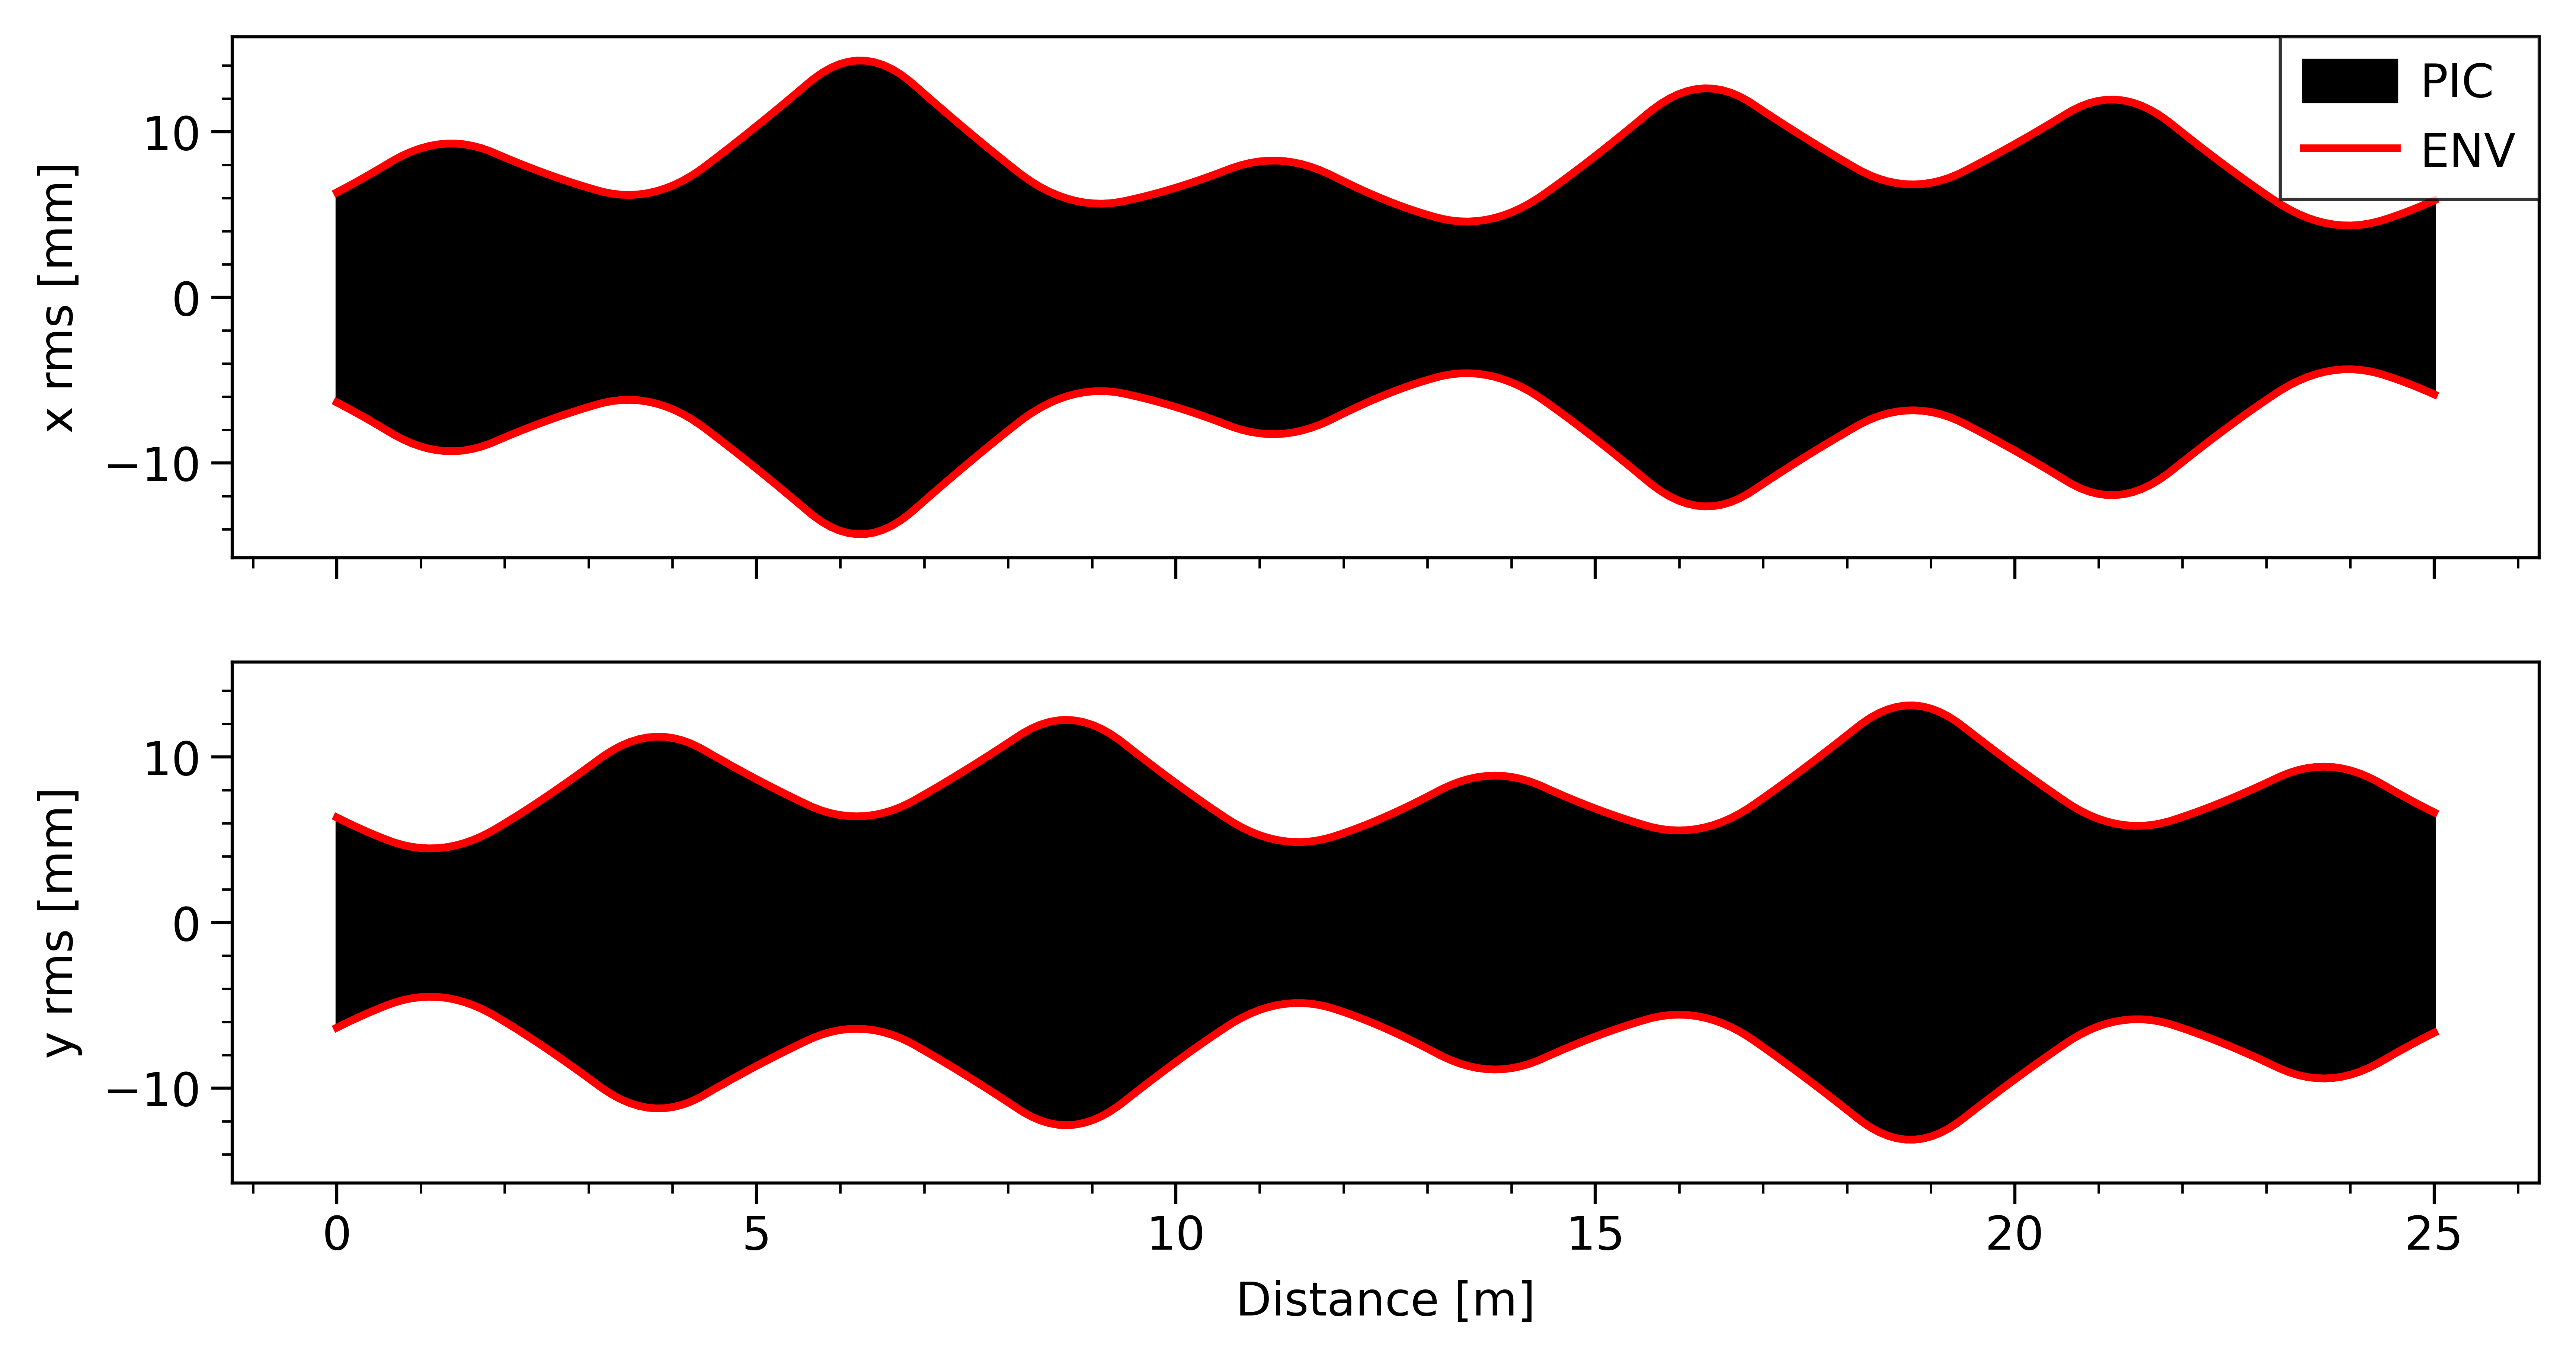

In [38]:
# Settings
periods = 5
path_length_max = 0.10
mass = 0.938  # [GeV]
kin_energy = 1.000  # [GeV]
histories = {} 

# Create two lattices (one for envelope nodes and one for space charge nodes).
lattices = []
for _ in range(2):
    lattice = make_fodo_lattice(
        phase_adv_x=np.radians(85.0),
        phase_adv_y=np.radians(85.0),
        length=5.0,
        mass=mass,
        kin_energy=kin_energy,
        max_part_length=path_length_max,
    )
    lattices.append(lattice)

# Create KV envelope object.
envelope = KVEnvelope(
    eps_x=10.00e-06,
    eps_y=10.00e-06,
    mass=0.938,
    kin_energy=1.000,
    length=100.0,
    intensity=(25.0 * 1.00e14),
)

# Track envelope, storing rms beam size vs. distance
lattice = lattices[0]
tracker = KVEnvelopeTracker(lattice, path_length_max=path_length_max)
tracker.match_zero_sc(envelope)
envelope_init = envelope.copy()  # store initial envelope

envelope = envelope_init.copy()
histories["envelope"] = tracker.track(envelope, history=True, periods=periods)

# Add space charge nodes to second lattice
lattice = lattices[1]
sc_calc = SpaceChargeCalc2p5D(64, 64, 1)
sc_path_length_min = 1.00e-06
sc_nodes = setSC2p5DAccNodes(lattice, sc_path_length_min, sc_calc)

# Track bunch, storing rms beam size at same locations
bunch = envelope_init.to_bunch(env=False, size=100_000)

monitor = BunchMonitor()
action_container = AccActionsContainer()
action_container.addAction(monitor, AccActionsContainer.ENTRANCE)
action_container.addAction(monitor, AccActionsContainer.EXIT)

for periods in range(periods):
    lattice.trackBunch(bunch, actionContainer=action_container)

histories["bunch"] = monitor.package_history()

# Plot rms beam size vs. distance.
fig, axs = plt.subplots(nrows=2, figsize=(8.0, 4.0), sharex=True, sharey=True)
for ax, key in zip(axs, ["xrms", "yrms"]):
    ax.fill_between(
        histories["bunch"]["s"], 
        -histories["bunch"][key] * 1000.0, 
        +histories["bunch"][key] * 1000.0,
        color="black",
    )
    for sign in [-1.0, +1.0]:
        ax.plot(
            histories["envelope"]["s"], 
            histories["envelope"][key] * sign * 1000.0, 
            color="red",
        )
axs[1].set_xlabel("Distance [m]")
axs[0].set_ylabel("x rms [mm]")
axs[1].set_ylabel("y rms [mm]")
axs[0].legend(loc="upper right", labels=["PIC", "ENV"])
plt.show()


Notice the space-charge-driven coupling between the beam size in either plane.

## Conclusion

This envelope tracker implementation is a little hacky. For operational use, PyORBIT will eventually develop a more robust envelope tracker that integrates with the existing code base and can handle arbitrary coupling in the lattice and beam. For now, though, this tracker will be a very nice utility to benchmark PIC codes against envelope tracker assumptions. I also plan to use this tracker to reproduce particle-core resonance studies from older papers, with the hope of furhter developing these models and applying them to data from the SNS.

The envelope solver code is currently on [this branch](https://github.com/austin-hoover/pyorbit/tree/danilov-envelope) of my PyORBIT fork.